# 目录
## 1 项目背景分析
## 2 理解数据
## 3 数据预处理
### 3.1 缺失值分析
### 3.2 对时间time进行一致化处理
## 4 数据分析
### 4.1 用户日访问量的分析
### 4.2 用户小时访问量的分析
### 4.3 不同用户不同的行为分析
### 4.4 用户购买次数情况分析
#### 4.4.1 日ARPPU
#### 4.4.2 日ARPU
### 4.5 付费率分析
### 4.6 同一时间段，用户消费次数分析
### 4.7 复购行为分析
### 4.8 漏斗流失分析
### 4.9 用户价值的RFM分析
## 5 提出结论



 分析方法：

指标：

1.日PV和日UV分析

2.付费率分析

3.复购行为分析

4.漏洞流失分析

5.用户价值RFM分析


### 1.项目背景分析
该项目的数据集来源于天池，是由阿里巴巴提供的一个淘宝用户行为数据集，其中包含了2014年11月18日至2014年12月18日之间，一千万个随机用户的所有用户行为（行为包括点击、购买、加购、收藏）数据。

#### 分析目的：
>通过对通过对淘宝用户的点击、加购、收藏、购买行为进行深入研究，让企业或者店铺更好地了解用户行为习惯，为网络营销提供指导意义，也为取得新成绩打下坚实的基础。

### 2.理解数据

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid",font_scale=1.5)
plt.rcParams['font.family'] = ['Arial Unicode MS']
plt.rcParams["axes.unicode_minus"] = False


In [3]:
d_user = pd.read_csv("../data/tianchi_mobile_recommend_train_user.csv", dtype=str)
d_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   item_id        object
 2   behavior_type  object
 3   user_geohash   object
 4   item_category  object
 5   time           object
dtypes: object(6)
memory usage: 561.1+ MB


In [4]:
d_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


### 3.数据预处理or数据清洗

#### 3.1 缺失值分析

In [5]:
d_user.apply(lambda x: sum(x.isnull())/len(x),axis=0)

user_id          0.00000
item_id          0.00000
behavior_type    0.00000
user_geohash     0.68001
item_category    0.00000
time             0.00000
dtype: float64

#### 3.2 对时间time进行一致化处理

In [6]:
d_user["date"] = d_user["time"].str[0:10]
d_user["hour"] = d_user["time"].str[11:]

In [7]:
d_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,NaN,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21,2014-12-16,21


In [8]:
d_user.dtypes

user_id          object
item_id          object
behavior_type    object
user_geohash     object
item_category    object
time             object
date             object
hour             object
dtype: object

In [9]:
d_user["date"] = pd.to_datetime(d_user["date"])
d_user["time"] = pd.to_datetime(d_user["time"])
d_user["hour"] = d_user["hour"].astype(int)
d_user.dtypes

user_id                  object
item_id                  object
behavior_type            object
user_geohash             object
item_category            object
time             datetime64[ns]
date             datetime64[ns]
hour                      int64
dtype: object

In [10]:
d_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,1,NaN,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21:00:00,2014-12-16,21


In [11]:
d_user.sort_values(by="time",ascending=True,inplace=True)

In [12]:
d_user.reset_index(drop=True,inplace=True)

In [13]:
d_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,73462715,378485233,1,NaN,9130,2014-11-18,2014-11-18,0
1,36090137,236748115,1,NaN,10523,2014-11-18,2014-11-18,0
2,40459733,155218177,1,NaN,8561,2014-11-18,2014-11-18,0
3,814199,149808524,1,NaN,9053,2014-11-18,2014-11-18,0
4,113309982,5730861,1,NaN,3783,2014-11-18,2014-11-18,0


In [15]:
d_user.describe(include="all")

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
count,12256906,12256906,12256906,3922082,12256906,12256906,12256906,1.225691e+07
unique,10000,2876947,4,575458,8916,744,31,NaN
top,36233277,112921337,1,94ek6ke,1863,2014-12-11 22:00:00,2014-12-12 00:00:00,NaN
freq,31030,1445,11550581,1052,393247,54797,691712,NaN
first,NaN,NaN,NaN,NaN,NaN,2014-11-18 00:00:00,2014-11-18 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2014-12-18 23:00:00,2014-12-18 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.481799e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.474778e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01


### 4.数据分析or构建模型

#### 4.1 用户日访问量的分析

In [17]:
pv_daily = d_user.groupby("date").count()[["user_id"]].rename(columns={"user_id":"pv"})
type(pv_daily)

pandas.core.frame.DataFrame

In [18]:
pv_daily.head()

,pv
date,
2014-11-18,366701
2014-11-19,358823
2014-11-20,353429
2014-11-21,333104
2014-11-22,361355


In [19]:
uv_daily = d_user.groupby("date")[["user_id"]].apply(lambda x:x.drop_duplicates().count())

In [20]:
uv_daily.rename(columns={"user_id":"uv"},inplace=True)
uv_daily.head()

,uv
date,
2014-11-18,6343
2014-11-19,6420
2014-11-20,6333
2014-11-21,6276
2014-11-22,6187


In [21]:
pv_uv_daily = pd.concat([pv_daily,uv_daily], axis=1)

In [22]:
pv_uv_daily.head()

,pv,uv
date,,
2014-11-18,366701,6343
2014-11-19,358823,6420
2014-11-20,353429,6333
2014-11-21,333104,6276
2014-11-22,361355,6187


In [23]:
pv_uv_daily.corr(method="pearson") # method="spearman"

,pv,uv
pv,1.000000,0.920602
uv,0.920602,1.000000


Text(0.5, 0.98, 'UV和PV变化趋势')

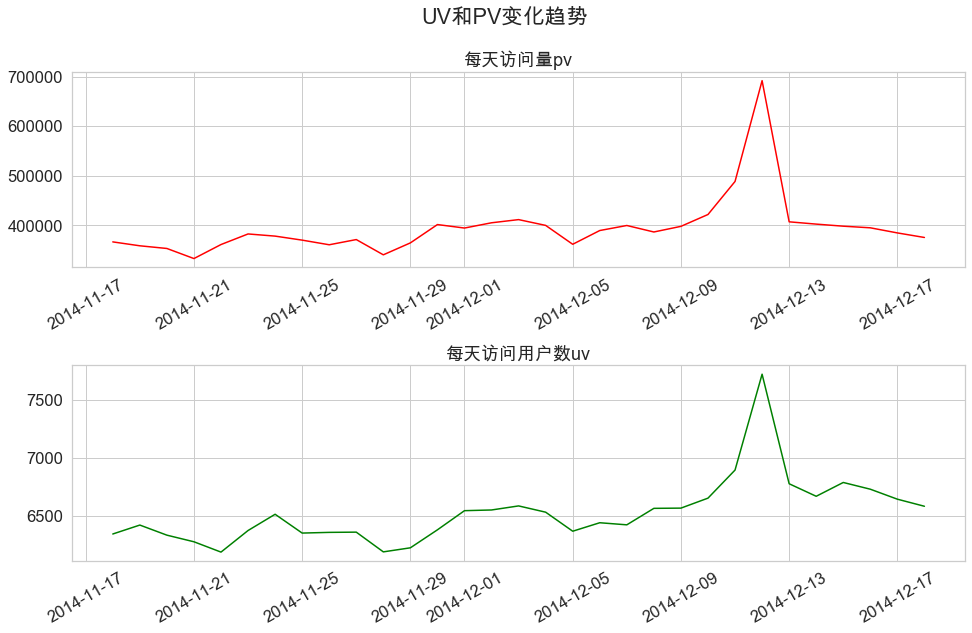

In [36]:
plt.figure(figsize=(16,9))
plt.subplot(211)
plt.plot(pv_daily,color="red")
plt.xticks(rotation=30)
plt.title("每天访问量pv")
plt.subplot(212)
plt.plot(uv_daily,color="green")
plt.xticks(rotation=30)
plt.title("每天访问用户数uv")
plt.subplots_adjust(wspace =0, hspace =0.5) # 调整子图间距
plt.suptitle("UV和PV变化趋势")

In [27]:
pv_hour = d_user.groupby("hour").count()[["user_id"]].rename(columns={"user_id":"pv"})
uv_hour = d_user.groupby("hour")[["user_id"]].apply(lambda x:x.drop_duplicates().count())
uv_hour.rename(columns={"user_id":"uv"},inplace=True)
pv_uv_hour = pd.concat([pv_hour,uv_hour], axis=1)

In [28]:
pv_uv_hour.corr(method="pearson") # 皮尔森相关系数

,pv,uv
pv,1.000000,0.835305
uv,0.835305,1.000000


In [37]:
pv_uv_hour.corr(method="spearman") # 斯皮尔曼相关系数

,pv,uv
pv,1.000000,0.903478
uv,0.903478,1.000000


通过观察uv和pv的变化趋势:
> 发现pv和uv成正相关，在双12期间，pv和uv达到峰值，且pv和uv的数值访问量差距比较大，同时，因为数据集总人数大约是10000人左右，因此，通过uv值可以分析出双十二期间淘宝用户的日活跃大概在45%周围浮动。

#### 4.2 用户小时访问量的分析

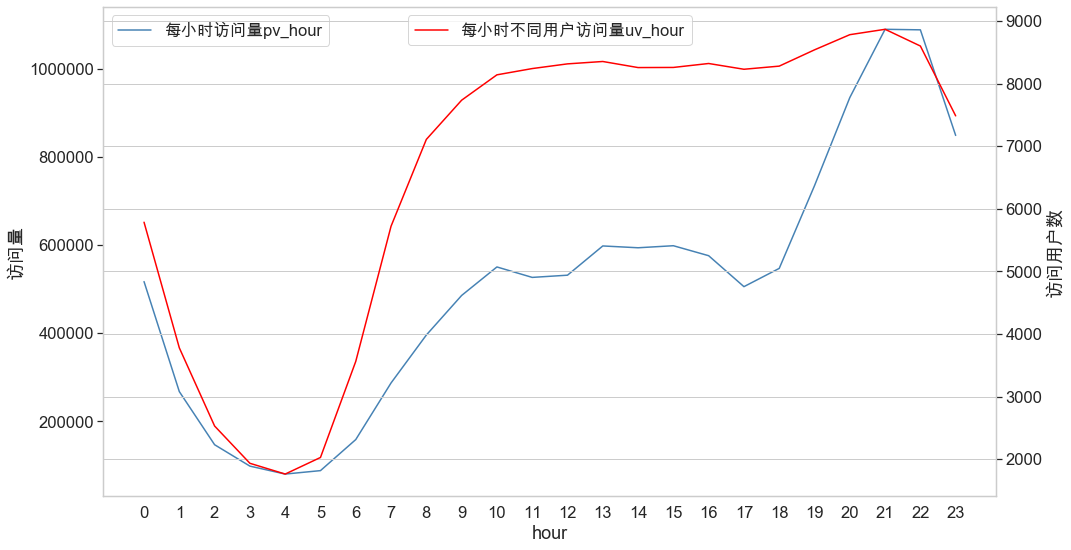

In [38]:
plt.figure(figsize=(16,9))

pv_uv_hour["pv"].plot(color="steelblue",label="每小时访问量pv_hour")
plt.ylabel("访问量")
plt.legend(loc="upper right")
pv_uv_hour["uv"].plot(color="red",label="每小时不同用户访问量uv_hour",secondary_y=True)
plt.ylabel("访问用户数")
plt.xticks(range(0,24),pv_uv_hour.index)

plt.legend(loc="upper center")
plt.grid(True)
plt.show()

通过分析小时访问量可知：
> pv和uv在凌晨0~5点之前，情况相同，均呈下降趋势，访问量也较小；
在晚上18点以后，pv的波动比较剧烈，相比来看uv不太明显，因此晚上18点以后是淘宝用户访问app的活跃时间段。


#### 4.3 不同用户不同的行为分析

In [40]:
pv_detail = pd.pivot_table(columns="behavior_type", index="hour",data=d_user,
                           values="user_id",aggfunc=np.size)

In [41]:
pv_detail 
# 不同行为每小时的访问量1：点击，2：收藏，3：加购物车，4：支付

behavior_type,1,2,3,4
hour,,,,
0,487341,11062,14156,4845
1,252991,6276,6712,1703
2,139139,3311,3834,806
3,93250,2282,2480,504
4,75832,2010,2248,397
5,83545,2062,2213,476
6,150356,3651,3768,1023
7,272470,5885,7044,1938
8,374701,7849,9970,3586


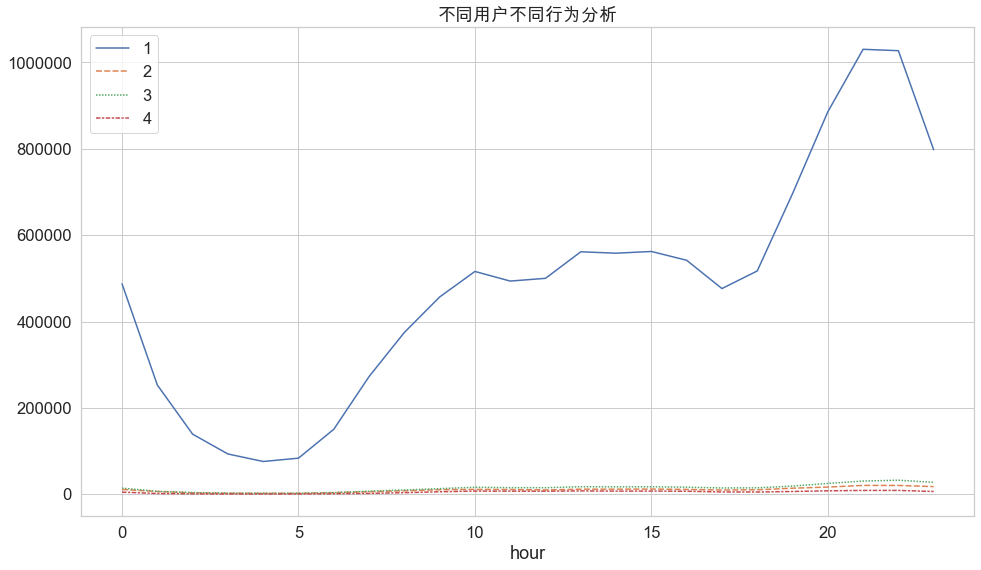

In [45]:
plt.figure(figsize=(16,9))
sns.lineplot(data=pv_detail) 
plt.title("不同用户不同行为分析")
plt.show()

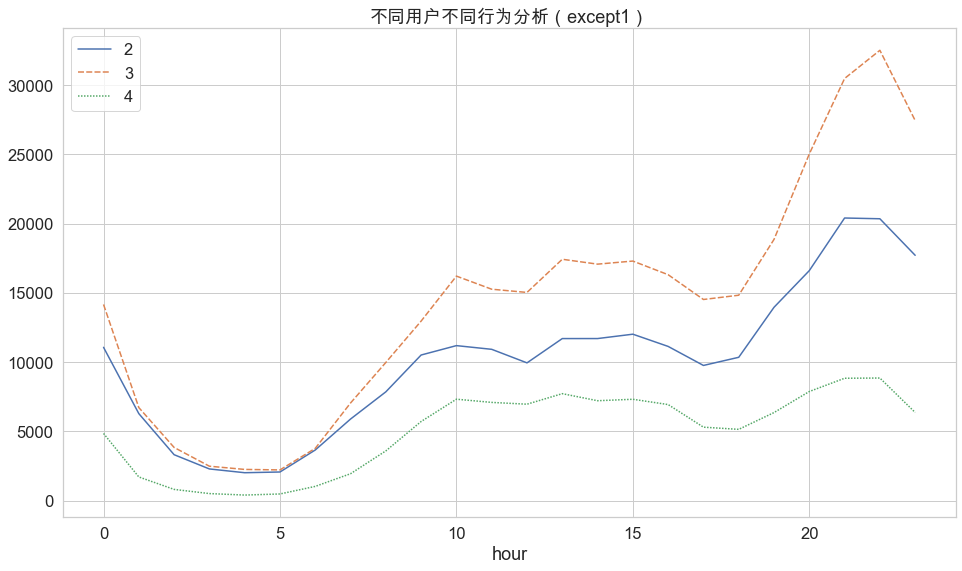

In [44]:
plt.figure(figsize=(16,9))
sns.lineplot(data=pv_detail.iloc[:,1:]) # 由于行为1数值较大，故剔除
plt.title("不同用户不同行为分析（except1）")
plt.show()


从上图发现：
> 点击这一用户行为相比较于其他三类用户行为，pv访问量较高，同时四种用户行为的波动情况基本一致，因此晚上这一时间段不管哪一种用户行为，pv访问量都是最高的;加入购物车这一用户行为的pv总量高于收藏的总量，因此在后续漏斗流失分析中，用户类型3应该在2之前分析。

#### 4.4 用户购买次数情况分析

In [46]:
# 购买用户的访问量
d_user_buy = d_user[d_user.behavior_type=="4"].groupby("user_id").size()

In [47]:
d_user_buy

user_id
100001878    36
100011562     3
100012968    15
100014060    24
100024529    26
             ..
99960313      8
9996155       6
99963140     19
99968428     38
99989881     17
Length: 8886, dtype: int64

In [48]:
d_user_buy.describe()

count    8886.000000
mean       13.527459
std        19.698786
min         1.000000
25%         4.000000
50%         8.000000
75%        17.000000
max       809.000000
dtype: float64

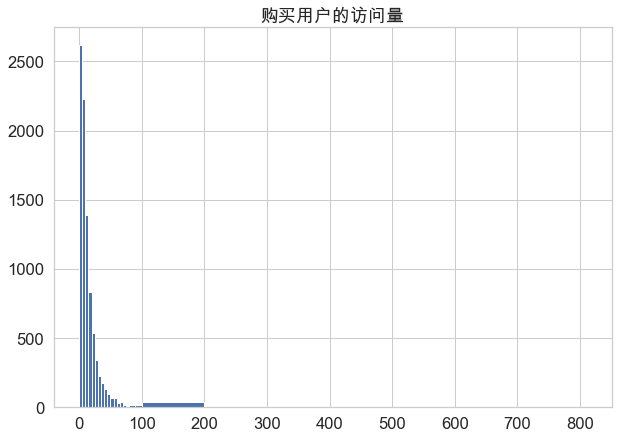

In [129]:
plt.figure(figsize=(10,7))
bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,90,100,200,300,800,810]
plt.hist(x=d_user_buy, bins=bins)
plt.title("购买用户的访问量")
plt.show()

上图显示：
> 淘宝用户消费次数普遍在10次以内，因此需要重点关注购买次数在10次以上的消费者用户群体。

#### 4.4.1日ARPPU 

In [54]:
# 日ARPPU =总收入/活跃用户付费数量
# 人均消费次数

d_user_buy1 = d_user[d_user.behavior_type=="4"].groupby(["date","user_id"]).count()["behavior_type"].reset_index().rename(columns={"behavior_type":"total"})

In [56]:
# 不同用户的人均消费次数
d_user_buy1

,date,user_id,total
0,2014-11-18,100001878,1
1,2014-11-18,100014060,2
2,2014-11-18,100024529,6
3,2014-11-18,100027681,3
4,2014-11-18,10004287,2
...,...,...,...
49196,2014-12-18,99674599,10
49197,2014-12-18,99785045,4
49198,2014-12-18,99791909,1
49199,2014-12-18,99795650,1


In [57]:
#因为本数据集没有消费金额，因此用消费次数代替消费金额
d_user_buy2 = d_user_buy1.groupby("date").sum()["total"]/d_user_buy1.groupby("date").count()["total"]

In [58]:
d_user_buy2 # 日ARPPU

date
2014-11-18    2.423652
2014-11-19    2.439444
2014-11-20    2.320375
2014-11-21    2.271429
2014-11-22    2.530120
2014-11-23    2.330780
2014-11-24    2.248031
2014-11-25    2.313961
2014-11-26    2.402824
2014-11-27    2.403405
2014-11-28    2.231623
2014-11-29    2.331881
2014-11-30    2.357236
2014-12-01    2.359083
2014-12-02    2.284543
2014-12-03    2.289334
2014-12-04    2.328707
2014-12-05    2.223041
2014-12-06    2.253444
2014-12-07    2.320741
2014-12-08    2.204384
2014-12-09    2.413576
2014-12-10    2.230236
2014-12-11    2.226363
2014-12-12    3.913523
2014-12-13    2.245320
2014-12-14    2.312749
2014-12-15    2.313460
2014-12-16    2.285455
2014-12-17    2.302548
2014-12-18    2.310567
Name: total, dtype: float64

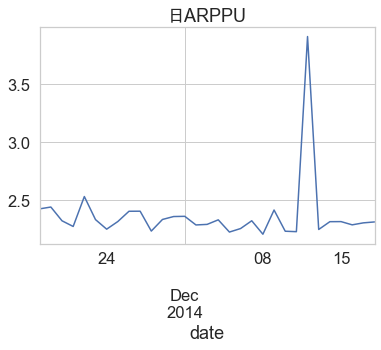

In [59]:
d_user_buy2.plot()
plt.title("日ARPPU")
plt.show()

上图显示：
> 根据日均消费次数变化趋势可知：双12的消费次数是最高的，平均每天消费次数大部分在1~2次间波动。

In [65]:
d_user_buy2.describe()

,total
count,375440.000000
mean,32.646777
std,67.340352
min,1.000000
25%,2.000000
50%,7.000000
75%,33.000000
max,2615.000000


#### 4.4.2 日ARPU--平均每用户收入 

In [60]:
# 日ARPU=总收入/活跃用户数Au
# 活跃用户数：每天有操作行为的用户

d_user["operation"] = 1
d_user_buy2 = d_user.groupby(["date","user_id","behavior_type"])["operation"].count().reset_index().rename(columns={"operation":"total"})

In [61]:
d_user_buy2

,date,user_id,behavior_type,total
0,2014-11-18,100001878,1,127
1,2014-11-18,100001878,3,8
2,2014-11-18,100001878,4,1
3,2014-11-18,100014060,1,23
4,2014-11-18,100014060,3,2
...,...,...,...,...
375435,2014-12-18,9996155,3,2
375436,2014-12-18,99963140,1,78
375437,2014-12-18,99963140,3,1
375438,2014-12-18,99968428,1,4


In [62]:
# 统计用户每天的平均消费次数 日ARPU
ARPU = d_user_buy2.groupby("date").apply(lambda x: x[x["behavior_type"]=="4"].total.sum()/len(x.user_id.unique()))

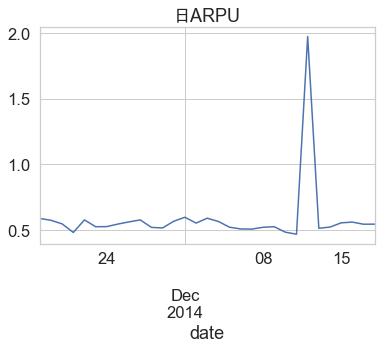

In [64]:
ARPU.plot(title="日ARPU")

> 由图可知：淘宝活跃用户，平均消费次数比较低，在双12当天可达到2.0。

#### 4.5 付费率
付费率=消费用户数/活跃用户数

In [68]:
pay_rate = d_user_buy2.groupby("date").apply(lambda x: x[x["behavior_type"]=="4"].total.count()/len(x.user_id.unique()))

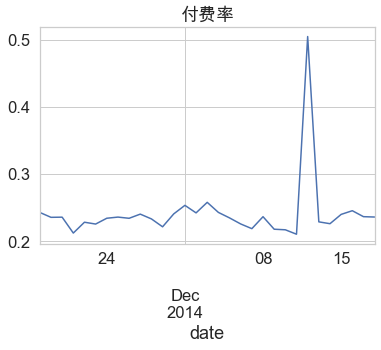

In [69]:
pay_rate.plot(title="付费率")

> 由图可知：购买用户每天的购买次数在0.2~0.3之间波动，在双12当天可达到0.5以上。

#### 4.6 同一时间段，用户消费次数的分布

In [71]:
d_user_buy3 = d_user[d_user["behavior_type"]=="4"].groupby(["user_id","date","hour"])["operation"].sum()

In [73]:
d_user_buy3

user_id    date        hour
100001878  2014-11-18  20      1
           2014-11-24  20      3
           2014-11-25  13      2
           2014-11-26  16      2
                       21      1
                              ..
99989881   2014-12-05  1       1
           2014-12-09  21      1
           2014-12-12  0       2
           2014-12-14  20      1
           2014-12-15  23      1
Name: operation, Length: 65223, dtype: int64

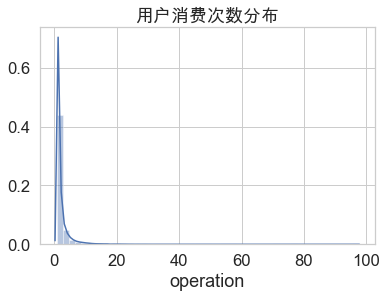

In [72]:
sns.distplot(d_user_buy3)
plt.title("用户消费次数分布")
plt.show()

上图可知：
> 大部分用户消费1次

#### 4.7 复购行为分析

In [75]:
# 复购率=复购行为的用户数/购买行为的用户总数

d_rebuy = d_user[d_user.behavior_type=="4"].groupby("user_id")["date"].apply(lambda x: len(x.unique()))

In [76]:
d_rebuy # 不同用户的不同日期的购买次数

user_id
100001878    15
100011562     3
100012968    11
100014060    12
100024529     9
             ..
99960313      5
9996155       3
99963140      8
99968428      9
99989881     13
Name: date, Length: 8886, dtype: int64

In [77]:
rebuy_rate = d_rebuy[d_rebuy>=2].count()/d_rebuy.count()

In [78]:
rebuy_rate

0.8717083051991897

In [79]:
# 获取用户复购情况
d_day_buy = d_user[d_user.behavior_type=="4"].groupby("user_id").date.apply(lambda x: x.sort_values()).diff(1).dropna()

In [146]:
d_day_buy

user_id            
100001878  2439076    6 days
           2439090    0 days
           2440428    0 days
           2660355    1 days
           2672617    0 days
                       ...  
99989881   8203371    4 days
           9248497    3 days
           9249028    0 days
           10601909   2 days
           11085567   1 days
Name: date, Length: 120204, dtype: timedelta64[ns]

In [135]:
# 复购时间间隔为什么会出现负数？？？
d = d_day_buy.map(lambda x: x.days)
d = d[d>0].value_counts()
d

1     14113
2      7508
3      4904
4      3438
5      2505
6      1846
7      1318
8      1045
9       787
10      624
11      493
12      419
13      370
14      299
15      237
16      210
17      137
18      126
19      123
20      100
21       72
23       67
22       61
24       27
26       25
25       22
27       15
29        9
28        7
30        1
Name: date, dtype: int64

In [136]:
# d.descripe()
d.describe()

count       30.000000
mean      1363.600000
std       2935.953826
min          1.000000
25%         62.500000
50%        223.500000
75%        980.500000
max      14113.000000
Name: date, dtype: float64

# 复购行为需要重点研究???

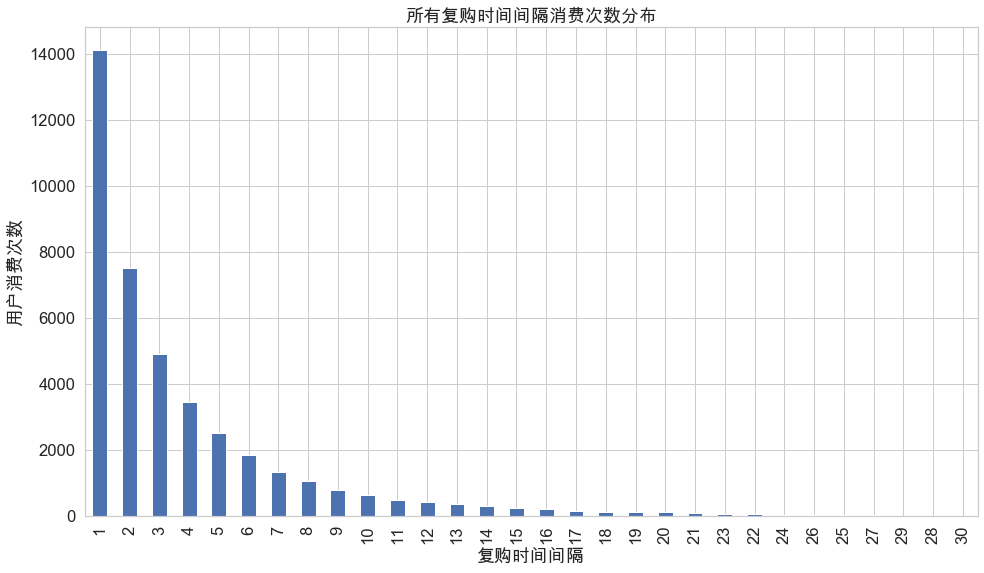

In [140]:
plt.figure(figsize=(16,9))
d.plot(kind="bar")
plt.title("所有复购时间间隔消费次数分布")
plt.xlabel("复购时间间隔")
plt.ylabel("用户消费次数")
plt.xticks(rotation=90)
plt.show()

上图分析可知：
> 一个月内，用户整体的复购率为81.17%，消费次数随着消费时间间隔的增加而不断下降，在1-10天之内复购次数比较多，因此需要重视10天之内的淘宝用户复购行为，增加用户复购。

#### 4.8 漏洞流失分析

In [93]:
d_user_count = d_user.groupby("behavior_type").size()
d_user_count

behavior_type
1    11550581
2      242556
3      343564
4      120205
dtype: int64

In [94]:
pv_all = d_user["user_id"].count()

In [95]:
(pv_all-d_user_count[0])/pv_all # 流失量

0.05762669632939993

In [96]:
(d_user_count[0] - d_user_count[2])/d_user_count[0] # 流失率 从浏览到加入购物车

0.9702556953628566

In [97]:
(d_user_count[2] - d_user_count[1])/d_user_count[2] # 从加入购物车到收藏

0.29400053556251526

In [98]:
(d_user_count[1] - d_user_count[3])/d_user_count[1] # 从收藏到购买的流失率

0.5044237207077953

漏斗流失分析：
> 浏览量-> 点击量  流失率为5.7%

> 点击量-> 加购物车  流失率为97%

> 加购物车-> 收藏 流失率为29%

> 收藏-> 购买量  流失率为50%

通过流失率的计算和分析重视每个环节极可能发生的原因和情况.

#### 4.9 用户价值的RFM分析

In [99]:
from datetime import datetime

In [100]:
# 参考日期-用户最近购买日期的间隔
recent_b_time = d_user[d_user["behavior_type"]=="4"].groupby("user_id")["date"].apply(lambda x: datetime(2014,12,20)-x.sort_values().iloc[-1])

In [101]:
recent_b_time 

user_id
100001878    2 days
100011562    4 days
100012968    2 days
100014060    2 days
100024529    4 days
              ...  
99960313     7 days
9996155     13 days
99963140     5 days
99968428     6 days
99989881     5 days
Name: date, Length: 8886, dtype: timedelta64[ns]

In [102]:
recent_b_time = recent_b_time.reset_index().rename(columns={"date":"recent"})

In [103]:
recent_b_time.recent = recent_b_time.recent.apply(lambda x:x.days)
recent_b_time

,user_id,recent
0,100001878,2
1,100011562,4
2,100012968,2
3,100014060,2
4,100024529,4
...,...,...
8881,99960313,7
8882,9996155,13
8883,99963140,5
8884,99968428,6


In [104]:
# 统计每个用户的消费频率

In [105]:
buy_freq = d_user[d_user["behavior_type"]=="4"].groupby("user_id").date.count()
buy_freq

user_id
100001878    36
100011562     3
100012968    15
100014060    24
100024529    26
             ..
99960313      8
9996155       6
99963140     19
99968428     38
99989881     17
Name: date, Length: 8886, dtype: int64

In [106]:
buy_freq = buy_freq.reset_index().rename(columns={"date":"freq"})
buy_freq

,user_id,freq
0,100001878,36
1,100011562,3
2,100012968,15
3,100014060,24
4,100024529,26
...,...,...
8881,99960313,8
8882,9996155,6
8883,99963140,19
8884,99968428,38


In [107]:
# 基于最近一次消费间隔和消费频次进行分析
rfm = pd.merge(recent_b_time,buy_freq,left_on="user_id",right_on="user_id")

In [108]:
# 由于数据集没有消费金额，所以只能针对消费间隔和消费频次进行分析
# 将各个维度分成两个程度，分数越高越好，基于等频分段

rfm["recent_value"] = pd.qcut(rfm.recent, 2, labels=["2","1"])
rfm["freq_value"] = pd.qcut(rfm.freq, 2, labels=["1","2"]) # 频率越大越好

In [109]:
rfm["rfm"] = rfm["recent_value"].str.cat(rfm["freq_value"])
rfm

,user_id,recent,freq,recent_value,freq_value,rfm
0,100001878,2,36,2,2,22
1,100011562,4,3,2,1,21
2,100012968,2,15,2,2,22
3,100014060,2,24,2,2,22
4,100024529,4,26,2,2,22
...,...,...,...,...,...,...
8881,99960313,7,8,1,1,11
8882,9996155,13,6,1,1,11
8883,99963140,5,19,2,2,22
8884,99968428,6,38,2,2,22


#### 分析rfm对客户进行分类，4类：
> 22：重点关注用户,加大关注力度。

> 21：忠诚度比较高的用户，但购买能力不足，可以适当给折扣或者进行捆绑消费。

> 12: 忠诚度不高，但购买能力较强因此也需要重点关注。

> 11: 针对这类用户，不需要太多的关注度。

### 5.提出结论

> (1)通过观察uv和pv的变化趋势：发现pv和uv成正相关，在双12期间，pv和uv达到峰值，且pv和uv的数值访问量差距比较大，同时，因为数据集总人数大约是10000人左右，因此，通过uv值可以分析出双十二期间淘宝用户的日活跃大概在45%周围浮动。

> (2)通过分析小时访问量可知：pv和uv在凌晨0~5点之前，情况相同，均呈下降趋势，访问量也较小； 在晚上18点以后，pv的波动比较剧烈，相比来看uv不太明显，因此晚上18点以后是淘宝用户访问app的活跃时间段。

> (3)通过不同用户的不同行为分析可知：点击这一用户行为相比较于其他三类用户行为，pv访问量较高，同时四种用户行为的波动情况基本一致，因此晚上这一时间段不管哪一种用户行为，pv访问量都是最高的，加入购物车这一用户行为的pv总量高于收藏的总量，因此在后续漏斗流失分析中，用户类型3应该在2之前分析；淘宝用户消费次数普遍在10次以内，因此需要重点关注购买次数在10次以上的消费者用户群体。

> (4)通过分析日ARPPU和日ARPU可知：日ARPPU和日ARPU均在双12当天较高。

> (5)通过对用户的复购行为分析可知：一个月内，用户整体的复购率为81.17%，消费次数随着消费时间间隔的增加而不断下降，在1-10天之内复购次数比较多，因此需要重视10天之内的淘宝用户复购行为，增加用户复购。

> (6)漏斗流失分析：

        浏览量-> 点击量 流失率为5.7% 
        点击量-> 加购物车 流失率为97% 
        加购物车-> 收藏 流失率为29% 
        收藏-> 购买量 流失率为50%。
        
        通过流失率的计算和分析重视每个环节极可能发生的原因和情况.

> (7)用户价值的RFM分析:

        22：重点关注用户,加大关注力度。
        21：忠诚度比较高的用户，但购买能力不足，可以适当给折扣或者进行捆绑消费。
        12: 忠诚度不高，但购买能力较强因此也需要重点关注。
        11: 针对这类用户，不需要太多的关注度。